<div align="center">
    <img src='../../xepimage.png' style='height:100px;'>
</div>


<center><h1 style='font-size:25px'>Model</h1></center>

---

**Autor: Guillermo J. Bergues**

Autogluon for Xepelin project.

Data = scale (third aproach).

In [1]:
! /opt/miniconda3/envs/myenv/bin/pip install --no-cache-dir autogluon -q

In [2]:
import pandas as pd 
import numpy as np

from autogluon.tabular import TabularPredictor, TabularDataset

# Metrics
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv ('../../Data/ds_scale.csv')

In [4]:
df.head()

amount  amountfinancedByXepelin  PayerId  ReceiverId  days
0 -0.189905                -0.140745      151          19     0
1 -0.193606                -0.140745      126          18     0
2 -0.173390                -0.140745      114          37     7
3 -0.017997                -0.060917      122          12    10
4 -0.189990                -0.140745       55          34    22

<AxesSubplot:>

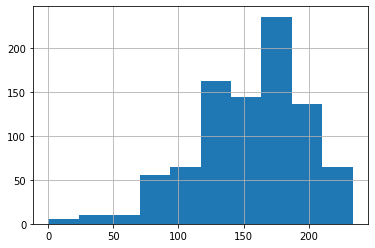

In [5]:
df['days'].hist()

In [6]:
save_path = "agModels"

In [7]:
df_train = df[df["days"] < 180]

In [8]:
label = 'amount'

In [9]:
df_train = TabularDataset(df)

In [10]:
predictor = TabularPredictor(label=label, path=save_path, eval_metric='median_absolute_error').fit(df_train, time_limit=18000)

Beginning AutoGluon training ... Time limit = 18000s
AutoGluon will save models to "agModels/"
AutoGluon Version:  0.4.2
Python Version:     3.8.10
Operating System:   Linux
Train Data Rows:    892
Train Data Columns: 4
Label Column: amount
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (21.67609672868223, -0.1992006785982021, 0.0, 1.00056)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    62388.46 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in

In [11]:
test_data = df[df["days"] >= 180]

In [12]:
df_test = TabularDataset(test_data)

In [13]:
# values to predict
y_test = df_test[label]  

In [14]:
# delete label column to prove we're not cheating
test_data_nolab = df_test.drop(columns=[label])  

In [15]:
test_data_nolab.head()

amountfinancedByXepelin  PayerId  ReceiverId  days
628                -0.140745      187          55   182
629                -0.140745      174          82   182
630                -0.140745      145          42   183
631                -0.140745      138          44   183
632                -0.140745      169          38   183

In [16]:
predictor = TabularPredictor.load(save_path)  

In [17]:
y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)

Predictions:  
 628   -0.191730
629   -0.191228
630   -0.191831
631   -0.185182
632   -0.191195
         ...   
887   -0.186076
888   -0.184820
889   -0.143495
890   -0.187148
891   -0.185920
Name: amount, Length: 264, dtype: float32


In [18]:
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: median_absolute_error on test data: -0.003003351421350192
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "median_absolute_error": -0.003003351421350192,
    "root_mean_squared_error": -0.0708471683271134,
    "mean_squared_error": -0.005019321259970339,
    "mean_absolute_error": -0.026002506859516578,
    "r2": 0.9651557850811286,
    "pearsonr": 0.9829974167440408
}


In [19]:
# Predictions and test data set
df_test_pred = pd.concat([y_test, y_pred], axis=1)
df_test_pred.columns = ['test', 'prediction']
df_test_pred['residual'] = df_test_pred['test'] - df_test_pred['prediction']
df_test_pred.head()

test  prediction  residual
628 -0.194870   -0.191730 -0.003140
629 -0.187945   -0.191228  0.003283
630 -0.192181   -0.191831 -0.000350
631 -0.186257   -0.185182 -0.001075
632 -0.190182   -0.191195  0.001014

Text(0, 0.5, 'Predicted values')

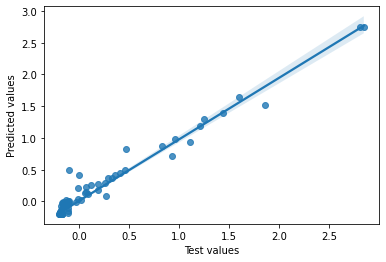

In [20]:
sns.regplot(x=y_test, y=y_pred);
plt.xlabel('Test values')
plt.ylabel('Predicted values')

In [21]:
predictor.leaderboard(test_data, silent=True)

model    score_test  score_val  pred_time_test  \
0        KNeighborsDist -3.399352e-09  -0.050071        0.010310   
1       RandomForestMSE -1.465880e-03  -0.006376        0.088656   
2         ExtraTreesMSE -1.893414e-03  -0.007681        0.088138   
3              CatBoost -2.436816e-03  -0.009166        0.005578   
4   WeightedEnsemble_L2 -3.003351e-03  -0.004234        0.238730   
5               XGBoost -3.451769e-03  -0.005536        0.012022   
6       NeuralNetFastAI -3.383148e-02  -0.054959        0.026836   
7        KNeighborsUnif -3.741559e-02  -0.054349        0.009520   
8        NeuralNetTorch -4.374490e-02  -0.049590        0.038832   
9              LightGBM -1.969670e-01  -0.197011        0.003964   
10           LightGBMXT -1.973505e-01  -0.197251        0.003077   
11        LightGBMLarge -2.010870e-01  -0.201077        0.003342   

    pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0        0.006820   0.004218                 0.010310                0.006820   
1        0.068133   0.645755                 0.088656                0.068133   
2        0.069591   0.618521                 0.088138                0.069591   
3        0.002448  20.979180                 0.005578                0.002448   
4        0.154660  24.526202                 0.005503                0.000453   
5        0.006057   0.591114                 0.012022                0.006057   
6        0.009665   1.360392                 0.026836                0.009665   
7        0.008637   0.005250                 0.009520                0.008637   
8        0.007978   1.367316                 0.038832                0.007978   
9        0.002326   0.291453                 0.003964                0.002326   
10       0.002455   0.753518                 0.003077                0.002455   
11       0.002533   0.575814                 0.003342                0.002533   

    fit_time_marginal  stack_level  can_infer  fit_order  
0            0.004218            1       True          2  
1            0.645755            1       True          5  
2            0.618521            1       True          7  
3           20.979180            1       True          6  
4            0.324316            2       True         12  
5            0.591114            1       True          9  
6            1.360392            1       True          8  
7            0.005250            1       True          1  
8            1.367316            1       True         10  
9            0.291453            1       True          4  
10           0.753518            1       True          3  
11           0.575814            1       True         11

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.026002506859516578
MSE: 0.005019321259970339
RMSE: 0.0708471683271134


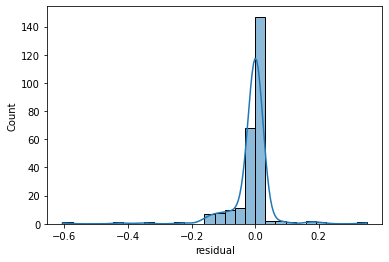

In [23]:
# Distributions of residuals
sns.histplot(data=df_test_pred, x='residual', kde=True, bins=30);

In [24]:
f_importance = predictor.feature_importance(df_test)
f_importance.head()

Computing feature importance via permutation shuffling for 4 features using 264 rows with 5 shuffle sets...
	5.71s	= Expected runtime (1.14s per shuffle set)
	1.76s	= Actual runtime (Completed 5 of 5 shuffle sets)


importance    stddev   p_value  n  p99_high   p99_low
amountfinancedByXepelin    0.001551  0.000337  0.000250  5  0.002243  0.000858
PayerId                    0.000537  0.000266  0.005359  5  0.001084 -0.000011
ReceiverId                 0.000310  0.000196  0.011974  5  0.000714 -0.000093
days                       0.000033  0.000181  0.353559  5  0.000406 -0.000341